In [44]:
!pip install seaborn
!pip install xgboost
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.ensemble import ExtraTreesRegressor
!pip install category_encoders
import category_encoders as ce

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [45]:
rent = pd.read_csv('E:/ml_Dzyuin/Практика_11/move.csv')
rent.drop('Unnamed: 0', axis=1, inplace=True)
rent

metro  price   way  views  \
0                      Planernaia   45000  walk    513   
1                           VDNKh   50000  walk    389   
2                   Alekseevskaia   50000  walk    483   
3                        Sviblovo   38000  walk    414   
4                        Rimskaia   55999  walk    360   
...                            ...    ...   ...    ...   
1441                    Solntcevo   25000  walk    189   
1442    Ulitca Starokachalovskaia   25000  walk    173   
1443                    Zhulebino   25000  walk    102   
1444   Preobrazhenskaia ploshchad   40000  walk     60   
1445                  Rasskazovka   30000  walk   2728   

                         provider  fee_percent  storey  minutes  storeys  \
0     realtor                               50       7       10       12   
1     realtor                               50      16       10       16   
2     realtor                               50       5        3       12   
3     realtor                               50       3       15        5   
4     realtor                               99       6        7       17   
...                           ...          ...     ...      ...      ...   
1441     realtor                             0       6        5       23   
1442     realtor                             0       5        5       17   
1443     realtor                             0       5        5       12   
1444     realtor                            30       3       17        9   
1445       owner                             0      12       10       17   

      living_area  kitchen_area  total_area  
0              19             8          38  
1              18             8          41  
2              19             5          33  
3              37            37          37  
4              21            10          40  
...           ...           ...         ...  
1441           20            10          36  
1442           20            10          38  
1443           20            10          35  
1444           20             8          35  
1445           22             8          33  

[1446 rows x 12 columns]

In [46]:
rent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1446 entries, 0 to 1445
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   metro         1446 non-null   object
 1   price         1446 non-null   int64 
 2   way           1446 non-null   object
 3   views         1446 non-null   int64 
 4   provider      1446 non-null   object
 5   fee_percent   1446 non-null   int64 
 6   storey        1446 non-null   int64 
 7   minutes       1446 non-null   int64 
 8   storeys       1446 non-null   int64 
 9   living_area   1446 non-null   int64 
 10  kitchen_area  1446 non-null   int64 
 11  total_area    1446 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 135.7+ KB


In [47]:
dupl = len(rent)- len(rent.drop_duplicates())
print('Количество дубликатов в выборке: ', dupl)

Количество дубликатов в выборке:  1201


In [48]:
# Удаление дубликатов из выборки
rent.drop_duplicates(inplace=True)
rent.reset_index(inplace=True, drop=True)

In [49]:
rent['metro'].unique()

array([' Planernaia ', ' VDNKh ', ' Alekseevskaia ', ' Sviblovo ',
       ' Rimskaia ', ' Perovo ', ' Nekrasovka ', ' Riazanskii prospekt ',
       ' Medvedkovo ', ' Khovrino ', ' Okskaia ', ' Vystavochnaia ',
       ' Otradnoe ', ' Kuntcevskaia ', ' Shabolovskaia ',
       ' Dobryninskaia ', ' Paveletckaia ', ' Altufevo ', ' Tcaritcyno ',
       ' Shchelkovskaia ', ' Skhodnenskaia ', ' Solntcevo ',
       ' Ulitca Starokachalovskaia ', ' Zhulebino ',
       ' Preobrazhenskaia ploshchad ', ' Rasskazovka ',
       ' Buninskaia Alleia ', ' Fili ', ' Kommunarka ',
       ' Cherkizovskaia ', ' Lukhmanovskaia ', ' Teplyi Stan ',
       ' Prazhskaia ', ' Mezhdunarodnaia ', 'No data', ' Filatov Lug ',
       ' Annino ', ' Beliaevo ', ' Liublino ', ' Kuzminki ',
       ' Novye Cheremushki ', ' Marino ', ' Strogino ', ' Salarevo ',
       ' Piatnitckoe shosse ', ' Izmailovskaia ',
       ' Petrovsko-Razumovskaia ', ' Tekstilshchiki ', ' Novokosino ',
       ' Ulitca Dmitrievskogo ', ' Nagornaia

In [50]:
rent['metro'] = rent['metro'].apply(lambda x: x.strip())

In [51]:
#число квартир без указания метро
len(rent[rent['metro']=='No data'])

#Это могут быть квартиры, расположенные слишком далеко от метро. Далее их можно будет отделить в отдельный кластер.

36

In [52]:
rent['way'].unique()

array(['walk', 'transport'], dtype=object)

In [53]:
rent['provider'] = rent['provider'].apply(lambda x: x.strip())

In [54]:
rent['provider'].unique()

array(['realtor', 'owner', 'agency', 'Застройщик'], dtype=object)

In [55]:
rent['provider'].replace('Застройщик', 'builder', inplace=True)

In [56]:
set(rent['fee_percent'] < 0)

{False}

In [57]:
set(rent['fee_percent'] > 100)

{False}

In [58]:
set(rent.storey <= rent.storeys)

{True}

In [59]:
set(rent.kitchen_area + rent.living_area <= rent.total_area)

{False, True}

In [60]:
set((rent.kitchen_area > rent.total_area)|(rent.living_area > rent.total_area))

{False, True}

In [61]:
rent[(rent.kitchen_area > rent.total_area)|(rent.living_area > rent.total_area)]

metro   price        way  views provider  fee_percent  \
33           Kommunarka   40000       walk     65    owner           50   
94   Krasnogvardeiskaia   34000       walk     16   agency           60   
115  Piatnitckoe shosse   30000  transport     96    owner            0   
142           Vladykino   44000       walk     17   agency           50   
143   Buninskaia Alleia   29200  transport     20   agency           50   
144          Shelepikha   59000       walk     21   agency            0   
147             No data   31200       walk      5   agency           50   
148       Aviamotornaia   62100       walk     17   agency           50   
149            Govorovo   57000       walk     26   agency           50   
151            Salarevo   57000       walk     28   agency           50   
154              Annino   57000       walk     49   agency           50   
168    Ulitca 1905 goda  135000       walk     14   agency           25   
179        Belorusskaia  135000       walk     12   agency            0   
229            Salarevo   60000       walk     37   agency           50   

     storey  minutes  storeys  living_area  kitchen_area  total_area  
33        4       10       15           15             5           5  
94        8        8        9            6            18           6  
115       3       47       14           21             9           3  
142       4        7        5           10             4           8  
143       5       21       16           10             4           4  
144       2        6       12           19             7           8  
147       5        0        7           15             7           5  
148      15        5       23           11            10           4  
149      10        6       23           25            10           5  
151      23       19       24           15            16           7  
154      24        8       25           14             4           1  
168       8       12       44           26             7           8  
179       6       14        9           25             5           5  
229      15       19       25           12            11           4

In [62]:
#Общая площадь не может быть меньше жилой площади и/или площади кухни.
#Данную ошибку в данных можно исправить, заменив некорректные значения total_area на сумму living_area и kitchen_area.

rent['total_area'] = np.where((rent.kitchen_area > rent.total_area)|(rent.living_area > rent.total_area),
                            rent.kitchen_area + rent.living_area,
                            rent.total_area)

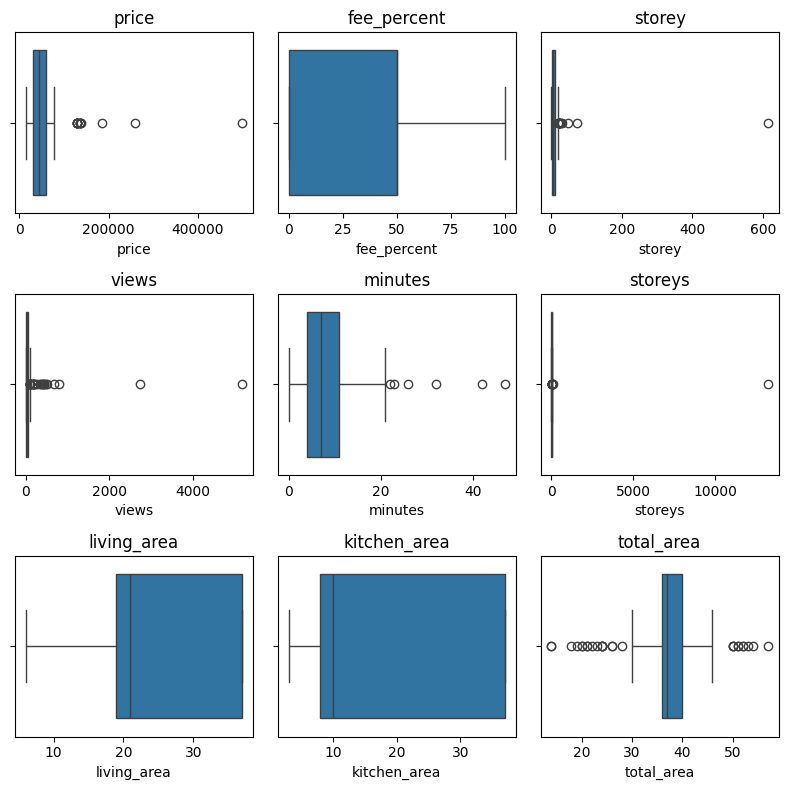

In [63]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))

outliers = ['price', 'fee_percent', 'storey', 'views',
            'minutes', 'storeys',
           'living_area', 'kitchen_area', 'total_area']

i = 0

for x in range(3):
    for y in range(3):

        sns.boxplot(data = rent,
                    x = outliers[i],
                   ax = axes[x, y])

        axes[x, y].set_title(outliers[i])

        i += 1

fig.tight_layout()
plt.show()

#Присутсвиют выбросы в следующих признаках: views, minutes, storey, storeys, total_area, price.

In [64]:
mins_outlier = rent[rent.minutes > 30]
mins_outlier

metro  price        way  views provider  fee_percent  \
71            Solntcevo  21000  transport     51    owner            0   
115  Piatnitckoe shosse  30000  transport     96    owner            0   
172              Mitino  30000  transport     68   agency           60   

     storey  minutes  storeys  living_area  kitchen_area  total_area  
71        5       32        9           30            12          42  
115       3       47       14           21             9          30  
172       6       42       12           19            12          38

In [65]:
df_mins = rent[rent.minutes < 30]
mins = [int(df_mins[df_mins.metro == i].minutes.mean()) for i in rent.metro.unique()]
dct = {key: value for key, value in zip(rent.metro.unique(), mins)}

In [66]:
for metro in mins_outlier.metro:
    rent['minutes'] = np.where(rent['minutes'] > 30, dct[metro], rent.minutes)

In [67]:
rent[rent['storeys'] > 50]

metro   price   way  views provider  fee_percent  storey  \
39    Mezhdunarodnaia  260000  walk    110  realtor           50      74   
162  Bagrationovskaia   60000  walk     15   agency            0     613   

     minutes  storeys  living_area  kitchen_area  total_area  
39         0       95           31            20          51  
162       10    13217           18            10          40

In [68]:
rent.drop(rent[rent['storeys'] > 50].index, inplace=True)

In [69]:
# Проверка признака views
rent[rent['views'] > 500]

metro  price   way  views provider  fee_percent  storey  minutes  \
0    Planernaia  45000  walk    513  realtor           50       7       10   
5        Perovo  29000  walk   5174  realtor           40       2       15   
7    Planernaia  39000  walk    795  realtor           50       8       10   
8    Planernaia  35000  walk    687  realtor           50       6       15   
29  Rasskazovka  30000  walk   2728    owner            0      12       10   

    storeys  living_area  kitchen_area  total_area  
0        12           19             8          38  
5         5           17             7          31  
7         9           18             7          33  
8         9           17             6          34  
29       17           22             8          33

In [70]:
rent['views'].iloc[5] = 517
rent['views'].iloc[29] = 272

In [71]:
#Квартиры площадью 14 кв.м не является выбросом.
#Для того, чтобы не испортить качество модели, следует удалить выбросы по признакам storey, storeys и price.

In [72]:
rent = rent[(np.abs(stats.zscore(rent[['storey', 'storeys', 'price', 'views', 'total_area', 'minutes']])) < 3).all(axis=1)]

In [73]:
rent.reset_index(inplace=True, drop=True)

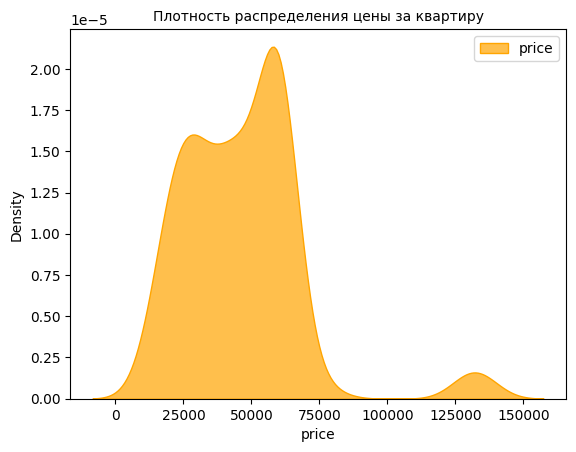

In [74]:
# Анализ признака price
sns.kdeplot(data=rent,
            x='price',
            shade=True,
            color="orange",
            label="price",
            alpha=.7,
            common_norm = True)

plt.title('Плотность распределения цены за квартиру', fontsize=10)
plt.legend()
plt.show()

#В среднем стоимость квартиры колеблется от 25 000 до 75 000 у.е.

In [75]:
# Выделение зависимой и независимых переменных
y = rent['price']
x = rent.drop('price', axis=1)

In [76]:
# Разбиение выборки на обучающую и тестовую
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=False)

In [77]:
# кодирование категориальных переменных
encoder = ce.CountEncoder()
x_train = encoder.fit_transform(x_train)
x_test = encoder.transform(x_test)

In [78]:
# RandomForestRegressor
rfr = RandomForestRegressor(max_depth=2)
# обучение модели
rfr.fit(x_train, y_train)
# Прогнозирование цены на тестовой выборке
rfr_pred = rfr.predict(x_test)

In [79]:
# XGBRegressor
xgb_r = xgb.XGBRegressor()
# обучение модели
xgb_r.fit(x_train, y_train)
# Прогнозирование цены на тестовой выборке
xgb_pred = xgb_r.predict(x_test)

In [80]:
# ExtraTreesRegressor
etr = ExtraTreesRegressor()
# обучение модели
etr.fit(x_train, y_train)
# Прогнозирование цены на тестовой выборке
etr_pred = etr.predict(x_test)

In [81]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_log_error

def mae(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    return round(mae, 3)

def mape(y_true, y_pred):
    mape = mean_absolute_percentage_error(y_true, y_pred)
    return round(mape, 3)

def rmsle(y_true, y_pred):
    if any(x < 0 for x in y_pred):
        y_pred = [abs(i) for i in y_pred]
    rmsle = mean_squared_log_error(y_true, y_pred, squared=False)
    return round(rmsle, 3)

In [82]:
# count encoding
metrics = pd.DataFrame({'RandomForest': [mae(y_test, rfr_pred), mape(y_test, rfr_pred), rmsle(y_test, rfr_pred)],
                       'XGBoost': [mae(y_test, xgb_pred), mape(y_test, xgb_pred), rmsle(y_test, xgb_pred)],
                       'ExtraTree': [mae(y_test, etr_pred), mape(y_test, etr_pred), rmsle(y_test, etr_pred)]},
                      index=['MAE', 'MAPE','RMSLE'])
metrics

#Модель ExtraTree лучше по всем рассчитанным метрикам

RandomForest    XGBoost  ExtraTree
MAE       13010.050  11891.822  11070.184
MAPE          0.269      0.245      0.209
RMSLE         0.339      0.298      0.265

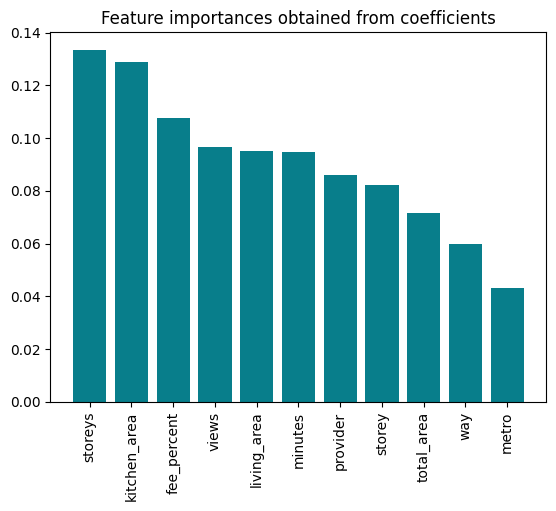

In [83]:
importances = pd.DataFrame(data={
    'Attribute': x_train.columns,
    'Importance': etr.feature_importances_})

importances = importances.sort_values(by='Importance', ascending=False)

plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=12)
plt.xticks(rotation='vertical')
plt.show()

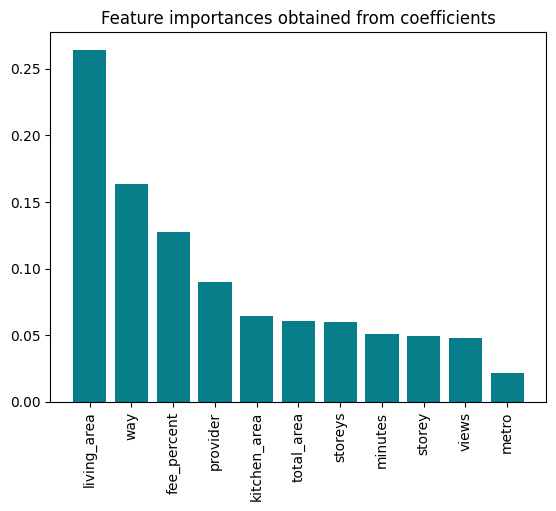

In [84]:
importances = pd.DataFrame(data={
    'Attribute': x_train.columns,
    'Importance': xgb_r.feature_importances_})

importances = importances.sort_values(by='Importance', ascending=False)

plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=12)
plt.xticks(rotation='vertical')
plt.show()

In [85]:
#Модель XGBoost описывает ситуацию более правдоподобно.

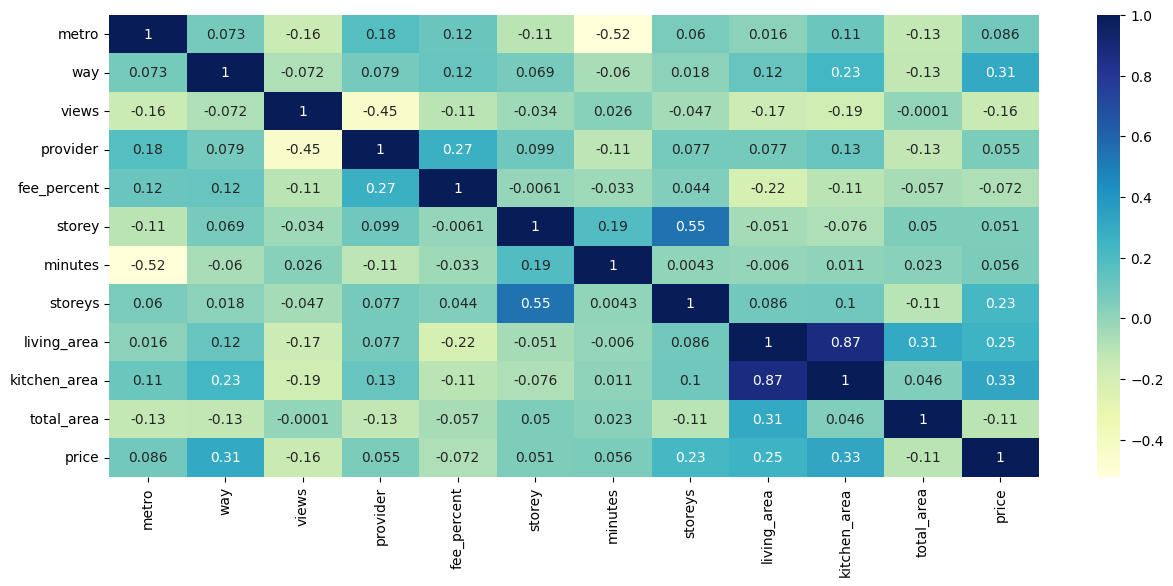

In [86]:
plt.figure(figsize=(15,6))
sns.heatmap(pd.concat([x_train, y_train], axis=1).corr(method='pearson'),annot=True,cmap="YlGnBu")
plt.show()

In [87]:
#Вывод: по результатам построенной модели можно сделать вывод, что наиболее важным признаком в ценообразовании квартиры является ее жилая площадь.
#Помимо этого, сильно влияют такие признаки, как: уровень удаленности от метро и количество этажей в доме.